In [97]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None


In [98]:
# Load dataset
df_abstract = pd.read_csv("../dataset/PUBMED_ABSTRACTS_TERM=hlh.csv")
df_abstract = df_abstract.drop(df_abstract.columns[0], axis=1)

df=df_abstract[["abstracts"]]
df["abstracts"] = df["abstracts"].astype(str)
df.head()

,abstracts
0,We describe a case of a previous healthy 20-ye...
1,Rheumatoid arthritis (RA) is a common autoimmu...
2,Tuberculosis (TB) is a leading cause of morbid...
3,"Pyoderma gangrenosum (PG) is an uncommon, seri..."
4,This study aimed to describe the prevalence of...


In [100]:
# LOWER CASE
df["abstracts_lower"] = df["abstracts"].str.lower()

# REMOVE PUNCTUATION
PUNCT_TO_REMOVE = string.punctuation
def remove_punctiation(text):
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))

df["abstract_wo_punct"] = df["abstracts_lower"].apply(lambda text:remove_punctiation(text))

# REMOVE STOPWORDS 
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["abstracts_wo_stop"] = df["abstract_wo_punct"].apply(lambda text:remove_stopwords(text))

# LEMATIZATION (find the root word)
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, 
                     pos in pos_tagged_text])

df["new_abstracts"] = df["abstracts_wo_stop"].apply(lambda text: lemmatize_words(text))

df.drop(["abstracts_lower","abstract_wo_punct","abstracts_wo_stop"], axis=1, inplace=True)
df.head()

,abstracts,new_abstracts
0,We describe a case of a previous healthy 20-ye...,describe case previous healthy 20yearold male ...
1,Rheumatoid arthritis (RA) is a common autoimmu...,rheumatoid arthritis ra common autoimmune dise...
2,Tuberculosis (TB) is a leading cause of morbid...,tuberculosis tb lead cause morbidity mortality...
3,"Pyoderma gangrenosum (PG) is an uncommon, seri...",pyoderma gangrenosum pg uncommon serious ulcer...
4,This study aimed to describe the prevalence of...,study aim describe prevalence epsteinbarr viru...


In [101]:
# FREQUENT WORDS
from collections import Counter

cnt = Counter()
for text in df["new_abstracts"].values:
    for word in text.split():
        cnt[word] += 1

FREQ = cnt.most_common(10)
FREQ = pd.DataFrame(FREQ)
FREQ

,0,1
0,hlh,10269
1,patient,6483
2,cell,5012
3,gene,2993
4,protein,2595
5,disease,2291
6,case,2247
7,lymphohistiocytosis,2121
8,hemophagocytic,2096
9,treatment,2011


In [102]:
!pip install matplotlib

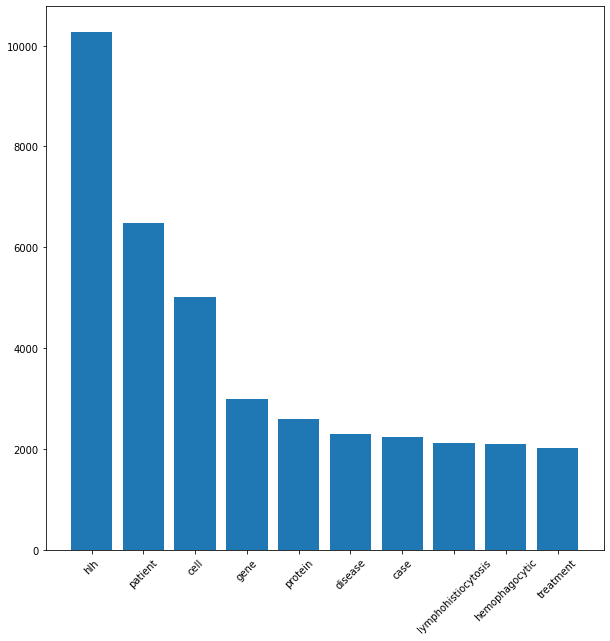

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.bar(FREQ[0],FREQ[1])
plt.xticks(rotation=45)


plt.savefig("../figures/FREQ_WORDS.png")

We can now see that in the third row, sent got converted to send since we provided the POS tag for lemmatization.